In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Importation des données

In [23]:
df_clients =  pd.read_csv('olist_customers_dataset.csv')
df_localisation =  pd.read_csv('olist_geolocation_dataset.csv')
df_commandes = pd.read_csv('olist_orders_dataset.csv')
df_articles =  pd.read_csv('olist_order_items_dataset.csv')
df_payements =  pd.read_csv('olist_order_payments_dataset.csv')
df_avis_commandes = pd.read_csv('olist_order_reviews_dataset.csv')
df_produits = pd.read_csv('olist_products_dataset.csv')
df_vendeurs = pd.read_csv('olist_sellers_dataset.csv')
df_produit_cat = pd.read_csv('product_category_name_translation.csv')

### Le dataframe df_clients

In [24]:
print('Les dimensions du dataframe : ', df_clients.shape)
df_clients.head()

Les dimensions du dataframe :  (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [25]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [119]:
miss = df_clients.isnull().sum()
miss_pourcent = (100 * df_clients.isnull().sum() / len(df_clients)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
customer_id,0,0.0
customer_unique_id,0,0.0
customer_zip_code_prefix,0,0.0
customer_city,0,0.0
customer_state,0,0.0


#### Recherche de duplicatas

In [121]:
df_clients.duplicated().sum()

0

In [122]:
df_clients.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [124]:
df_clients.describe(include="object")

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


### Le dataframe df_localisation

In [174]:
print('Les dimensions du data testing : ', df_localisation.shape)
df_localisation.head()

Les dimensions du data testing :  (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [175]:
df_localisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [176]:
miss = df_localisation.isnull().sum()
miss

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [177]:
miss = df_localisation.isnull().sum()
miss_pourcent = (100 * df_localisation.isnull().sum() / len(df_localisation)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
geolocation_zip_code_prefix,0,0.0
geolocation_lat,0,0.0
geolocation_lng,0,0.0
geolocation_city,0,0.0
geolocation_state,0,0.0


In [132]:
df_localisation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [183]:
my_data = df_localisation.drop(['geolocation_city','geolocation_state'], axis=1)
X = my_data.values

In [184]:
from sklearn import preprocessing

scale = preprocessing.StandardScaler().fit(X)
ada_scaled = scale.transform(X)

In [185]:
df = pd.DataFrame(ada_scaled)
df.columns = ['CodePostal','Latitude','Longitude']

In [186]:
df.describe()

,CodePostal,Latitude,Longitude
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,-1.276943e-13,1.225779e-14,1.255874e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.164450e+00,-2.699368e+00,-1.289918e+01
25%,-8.346885e-01,-4.246765e-01,-5.111852e-01
50%,-3.287853e-01,-3.049801e-01,-5.792788e-02
75%,8.815199e-01,2.093354e-01,6.142830e-01
max,2.075851e+00,1.158917e+01,3.922855e+01


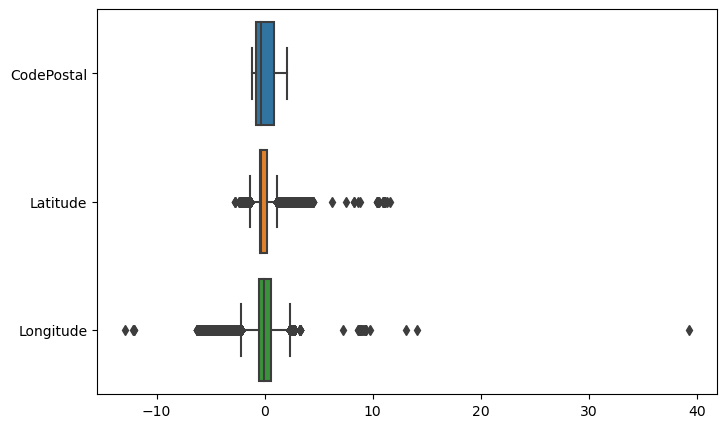

In [187]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,orient="h")
plt.show()     

### Le dataframe df_commandes

In [188]:
print('Les dimensions du data testing : ', df_commandes.shape)
df_commandes.head()

Les dimensions du data testing :  (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [189]:
df_commandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [190]:
miss = df_commandes.isnull().sum()
miss

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [191]:
df_commandes.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [192]:
miss_pourcent = (100 * df_commandes.isnull().sum() / len(df_commandes)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
order_delivered_customer_date,2965,2.982
order_delivered_carrier_date,1783,1.793
order_approved_at,160,0.161
order_id,0,0.000
customer_id,0,0.000
order_status,0,0.000
order_purchase_timestamp,0,0.000
order_estimated_delivery_date,0,0.000


In [193]:
com_data = df_commandes.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [194]:
com_data.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [195]:
df_commandes.duplicated().sum()

0

In [196]:
com_data.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,0,0,0,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


### Le dataframe df_articles

In [198]:
print('Les dimensions du dataframe articles : ', df_articles.shape)
df_articles.head()

Les dimensions du dataframe articles :  (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [199]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [201]:
miss = df_articles.isnull().sum()

In [202]:
df_articles.duplicated().sum()

0

In [203]:
df_articles.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Le dataframe df_payements

In [205]:
print('Les dimensions du dataframe : ', df_payements.shape)
df_payements.head()

Les dimensions du dataframe :  (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [206]:
df_payements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [207]:
miss = df_payements.isnull().sum()
miss

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [208]:
df_payements.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Le dataframe df_avis_commandes

In [210]:
print('Les dimensions du dataframe: ', df_avis_commandes.shape)
df_avis_commandes.head()

Les dimensions du dataframe:  (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [211]:
df_avis_commandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [213]:
miss = df_avis_commandes.isnull().sum()

In [214]:
miss_pourcent = (100 * df_avis_commandes.isnull().sum() / len(df_avis_commandes)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
review_comment_title,87656,88.342
review_comment_message,58247,58.703
review_id,0,0.000
order_id,0,0.000
review_score,0,0.000
review_creation_date,0,0.000
review_answer_timestamp,0,0.000


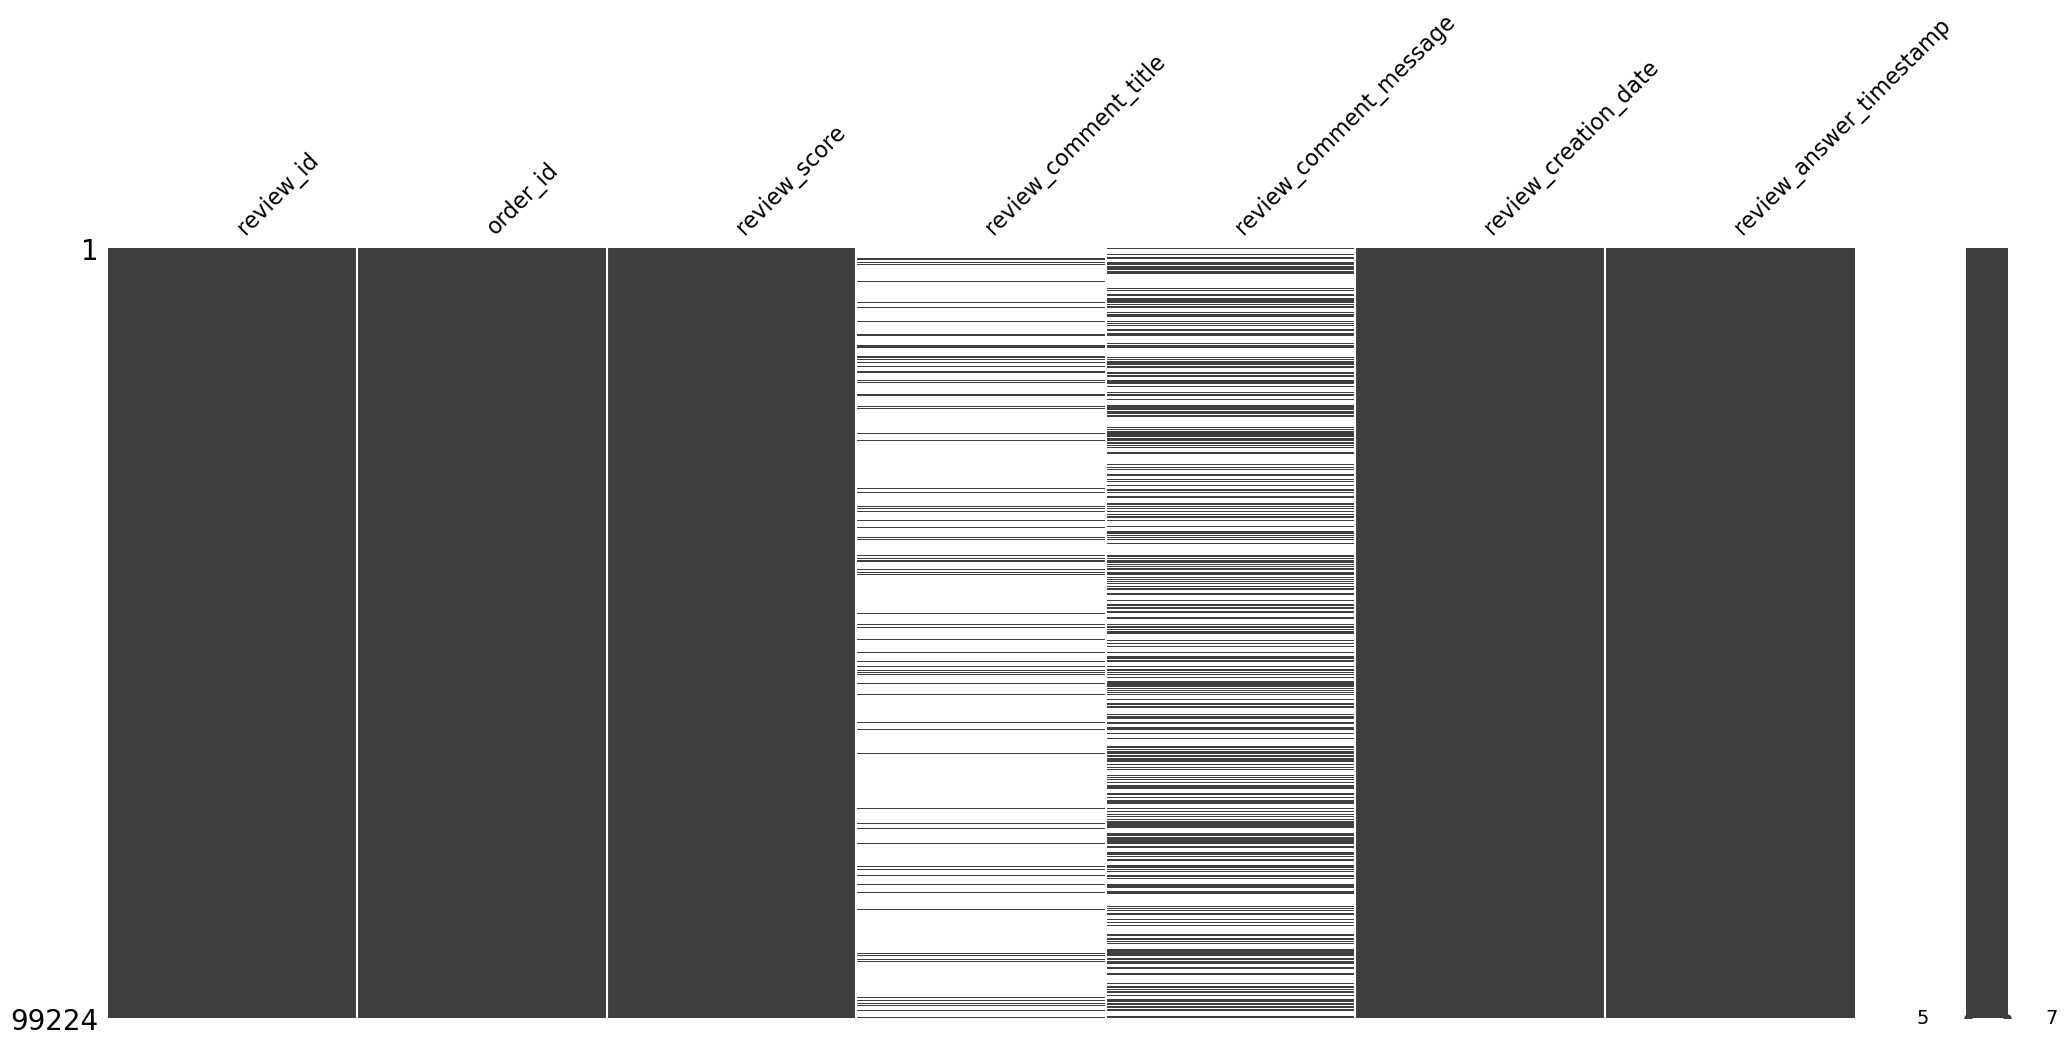

In [215]:
msno.matrix(df_avis_commandes);

In [216]:
df_avi = df_avis_commandes.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [217]:
df_avi

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13


In [219]:
df_avi.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [220]:
df_avi.duplicated().sum()

0

In [222]:
df_avi.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [223]:
df_avi

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13


###  Le dataframe df_produits

In [235]:
print('Les dimensions du dataframe: ', df_produits.shape)
df_produits.head()

Les dimensions du dataframe:  (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [236]:
df_produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [237]:
miss = df_produits.isnull().sum()

In [238]:
miss_pourcent = (100 * df_produits.isnull().sum() / len(df_produits)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
product_category_name,610,1.851
product_name_lenght,610,1.851
product_description_lenght,610,1.851
product_photos_qty,610,1.851
product_weight_g,2,0.006
product_length_cm,2,0.006
product_height_cm,2,0.006
product_width_cm,2,0.006
product_id,0,0.000


In [239]:
prod_data = df_produits.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [242]:
prod_data.duplicated().sum()

0

In [243]:
prod_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Le dataframe df_vendeurs 

In [246]:
print('Les dimensions du dataframe: ', df_vendeurs.shape)
df_vendeurs.head()

Les dimensions du dataframe:  (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [247]:
df_vendeurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [248]:
miss = df_vendeurs.isnull().sum()
miss

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [249]:
df_vendeurs.duplicated().sum()

0

In [250]:
df_vendeurs.describe(include="object")

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


### Le dataframe produit_cat

In [251]:
print('Les dimensions du dataframe: ', df_produit_cat.shape)
df_produit_cat.head()

Les dimensions du dataframe:  (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [252]:
df_produit_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [253]:
miss = df_produit_cat.isnull().sum()
miss

product_category_name            0
product_category_name_english    0
dtype: int64

In [113]:
df_produit_cat.duplicated().sum()

0

## Fusion des différentes tables avec la fonction merge

In [ ]:
# jointure entre 2 dataframes A et B
#pd.merge(A, B, left_on='id', right_on='identifiant')
# jointure entre 2 dataframes A et B
pd.merge(A, B, on='id')

In [254]:
# jointure entre les dataframes clients et commandes
df_Cli_com = pd.merge(df_clients, com_data, on='customer_id')

In [255]:
df0=  pd.merge(df_Cli_com, df_payements, on='order_id')

In [256]:
df1 = pd.merge(df0, df_avi, on='order_id')

In [257]:
df2 =  pd.merge(df1, df_articles, on='order_id')

In [258]:
df3 = pd.merge(df2, df_vendeurs, on='seller_id')

In [259]:
df4 = pd.merge(df3, df_produits, on='product_id')

In [260]:
df_m =df5 = pd.merge(df4, df_produit_cat, on='product_category_name')

In [261]:
df_m.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [262]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115609 non-null  object 
 9   order_delivered_carrier_date   115609 non-null  object 
 10  order_delivered_customer_date  115609 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  payment_sequential            

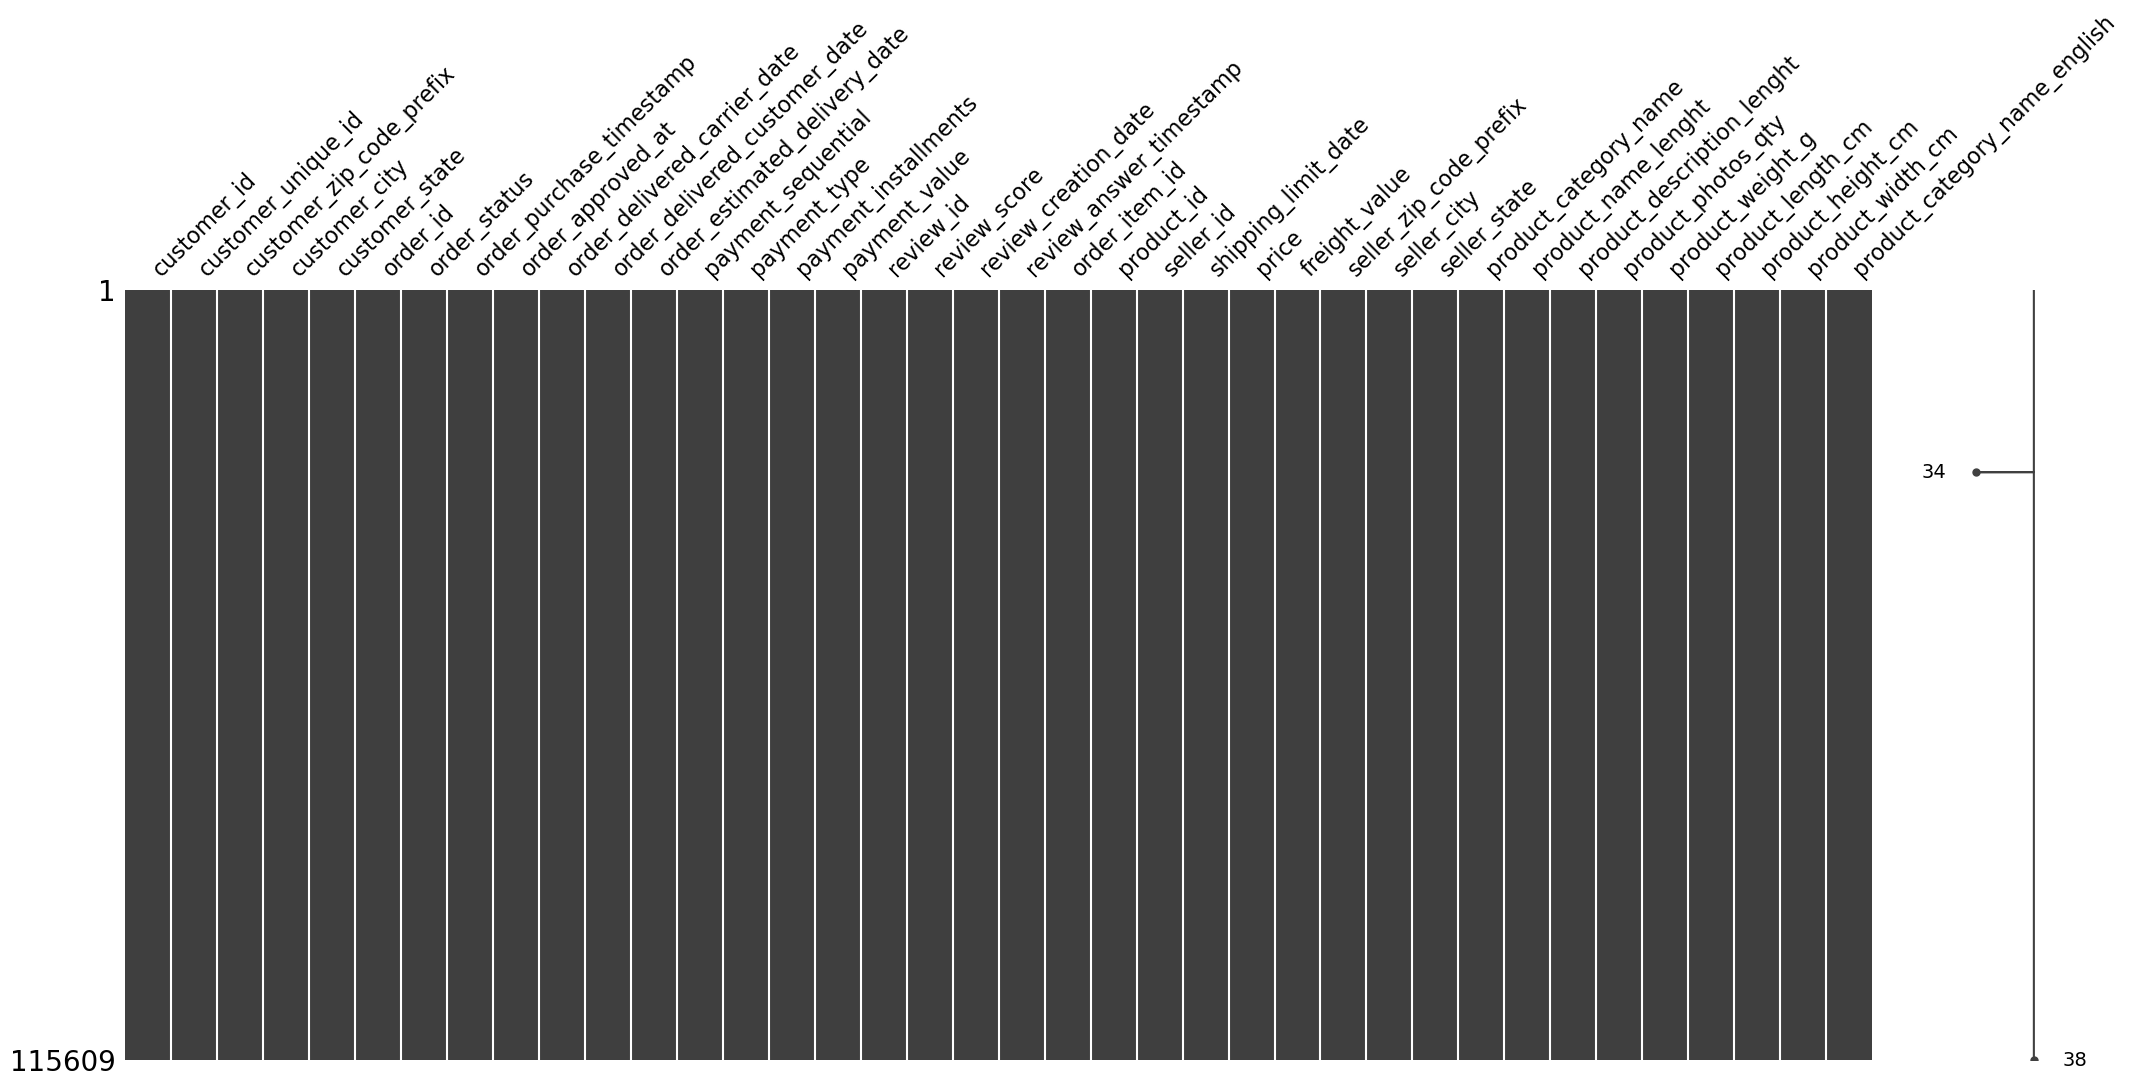

In [263]:
msno.matrix(df_m);

In [264]:
miss_pourcent = (100 * df_m.isnull().sum() / len(df_m)).round(3)

In [265]:
miss_pourcent

customer_id                      0.000
customer_unique_id               0.000
customer_zip_code_prefix         0.000
customer_city                    0.000
customer_state                   0.000
order_id                         0.000
order_status                     0.000
order_purchase_timestamp         0.000
order_approved_at                0.000
order_delivered_carrier_date     0.000
order_delivered_customer_date    0.000
order_estimated_delivery_date    0.000
payment_sequential               0.000
payment_type                     0.000
payment_installments             0.000
payment_value                    0.000
review_id                        0.000
review_score                     0.000
review_creation_date             0.000
review_answer_timestamp          0.000
order_item_id                    0.000
product_id                       0.000
seller_id                        0.000
shipping_limit_date              0.000
price                            0.000
freight_value            

In [266]:
df_m.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price           

In [267]:
num_data = ['customer_zip_code_prefix','payment_sequential','payment_installments','payment_value','review_score','order_item_id','price','freight_value','seller_zip_code_prefix','product_name_lenght',
         'product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']
df_data = df_m[num_data]

In [268]:
df_data

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,14409,1,2,146.87,4,1,124.99,21.88,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,68030,1,1,275.79,1,1,112.99,24.90,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,68030,1,1,275.79,1,2,112.99,24.90,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,92480,1,7,140.61,3,1,124.99,15.62,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,25931,1,10,137.58,4,1,106.99,30.59,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,89675,1,8,426.70,4,1,389.00,37.70,89701,59.0,284.0,2.0,12500.0,83.0,21.0,43.0
115605,13480,1,1,63.25,1,2,24.00,10.81,89701,41.0,194.0,1.0,450.0,31.0,10.0,18.0
115606,13870,1,3,160.46,5,1,139.00,21.46,89701,59.0,731.0,1.0,2200.0,84.0,12.0,15.0
115607,30130,1,2,55.18,5,1,129.00,26.18,89701,57.0,429.0,1.0,2700.0,85.0,7.0,40.0


In [269]:
df_data.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000
mean,35061.537597,1.093747,2.946233,172.387379,4.034409,1.194535,120.619850,20.056880,24515.713958,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167
std,29841.671732,0.729849,2.781087,265.873969,1.385584,0.685926,182.653476,15.836184,27636.640968,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083
min,1003.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.850000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11310.000000,1.000000,1.000000,60.870000,4.000000,1.000000,39.900000,13.080000,6429.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24241.000000,1.000000,2.000000,108.050000,5.000000,1.000000,74.900000,16.320000,13660.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,58745.000000,1.000000,4.000000,189.480000,5.000000,1.000000,134.900000,21.210000,28605.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99980.000000,29.000000,24.000000,13664.080000,5.000000,21.000000,6735.000000,409.680000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [270]:
my_data = df_data
X = my_data.values

In [272]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(X)
ada_scaled = scale.transform(X)

In [274]:
df = pd.DataFrame(ada_scaled)
df.columns = ['Cp_client','PaymSequentiel','PaymEchelne','PaymVal','ScoreCli','IdProdCom','Prix','Fret','CpVendeur',
              'LongProdNom','DescLongProd','QtePhotprod','PoidProd','LongProd','HautProd','LargProd']


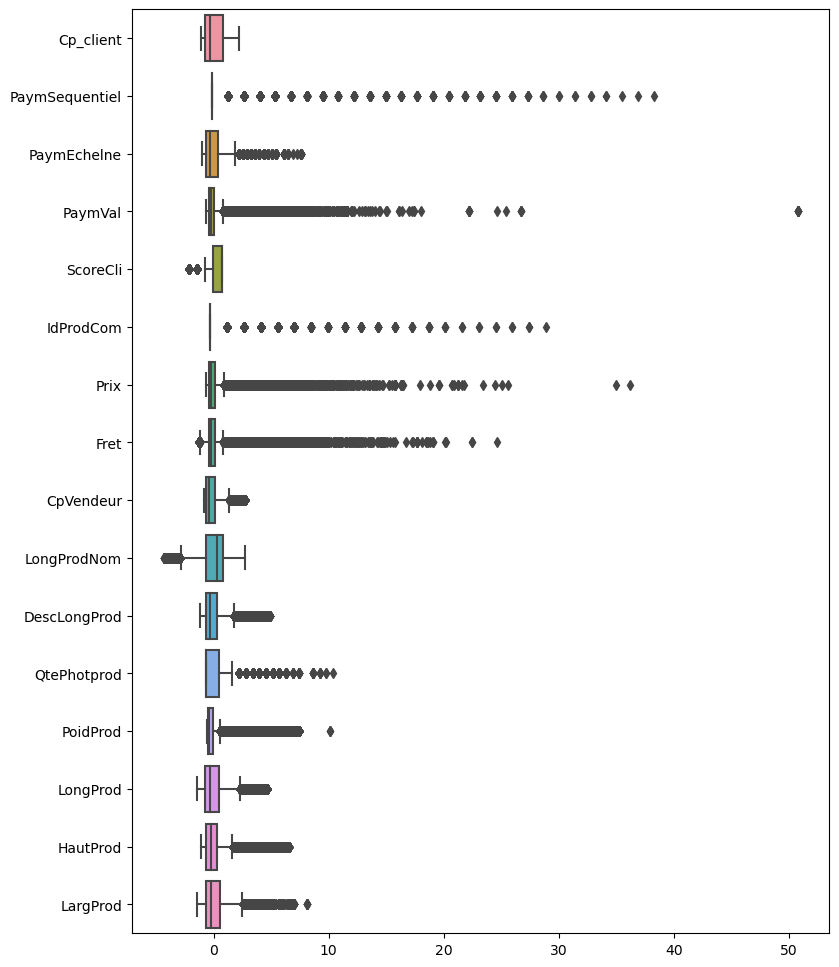

In [275]:
plt.figure(figsize=(9,12))
sns.boxplot(data=df, orient="h")
plt.show()

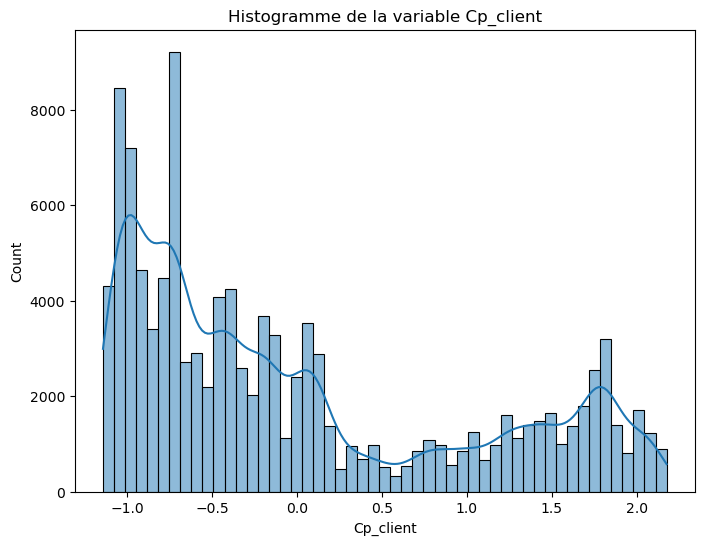

La variable Cp_client ne suit pas une loi normale (p-value=0.0)


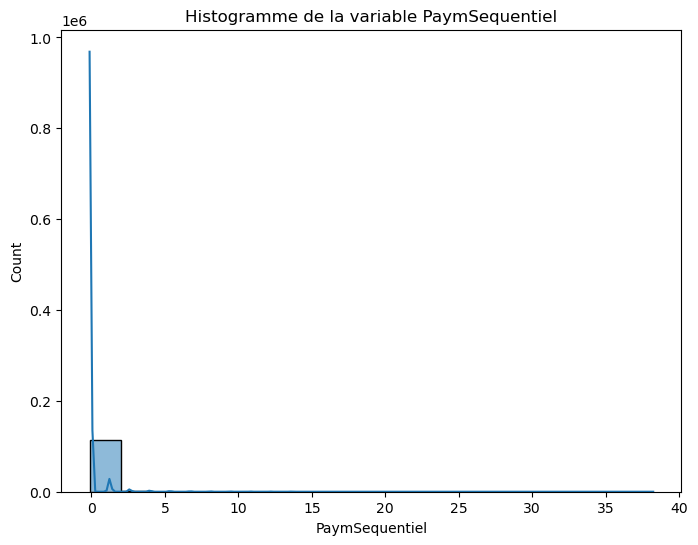

La variable PaymSequentiel ne suit pas une loi normale (p-value=0.0)


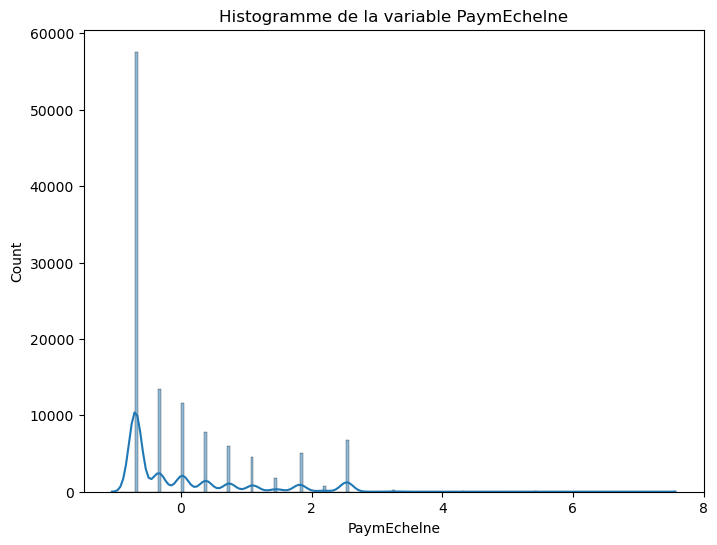

La variable PaymEchelne ne suit pas une loi normale (p-value=0.0)


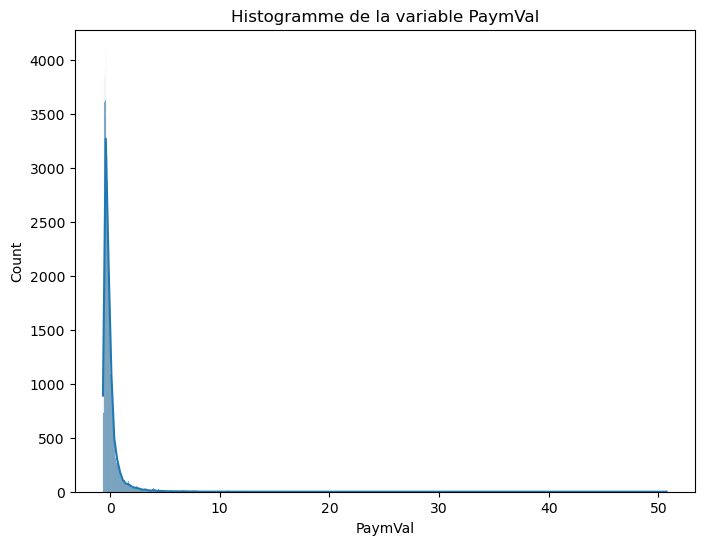

La variable PaymVal ne suit pas une loi normale (p-value=0.0)


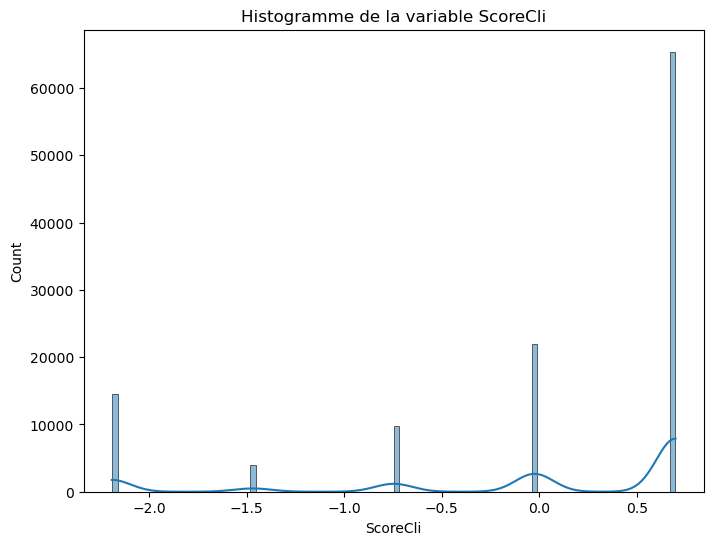

La variable ScoreCli ne suit pas une loi normale (p-value=0.0)


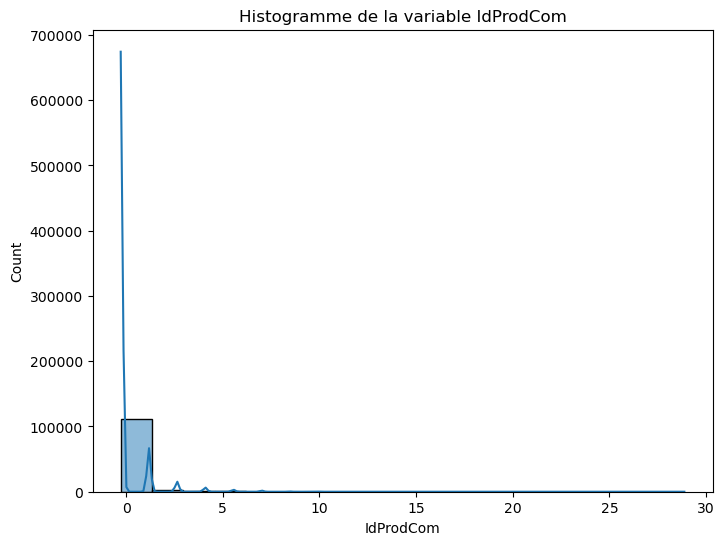

La variable IdProdCom ne suit pas une loi normale (p-value=0.0)


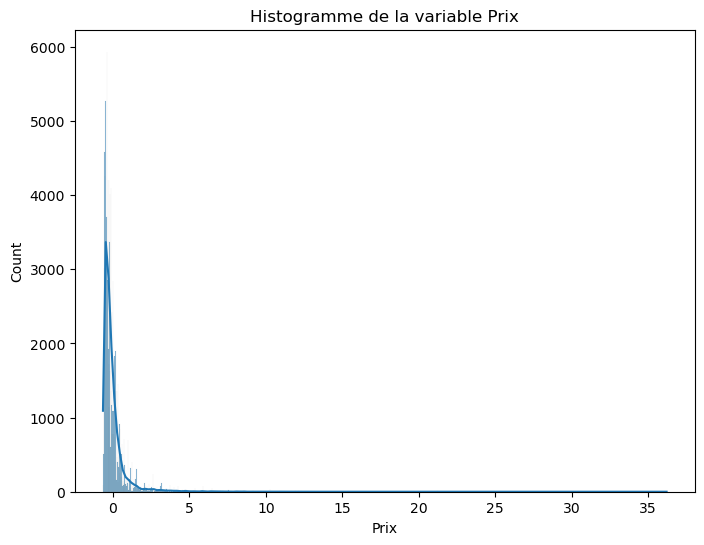

La variable Prix ne suit pas une loi normale (p-value=0.0)


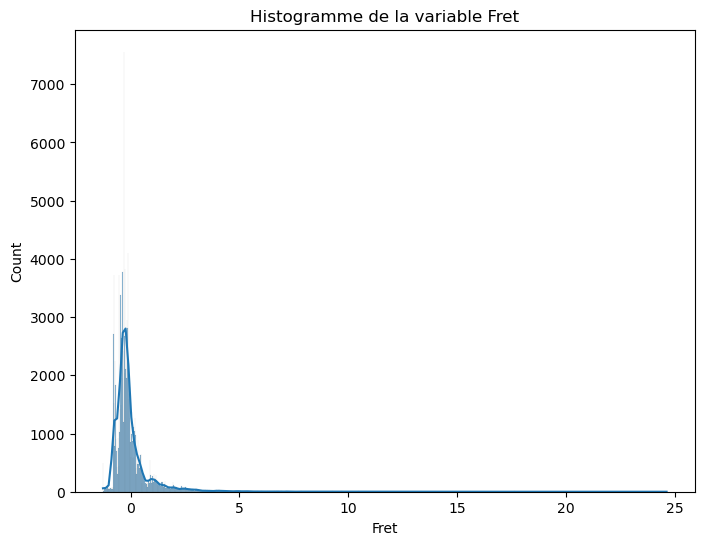

La variable Fret ne suit pas une loi normale (p-value=0.0)


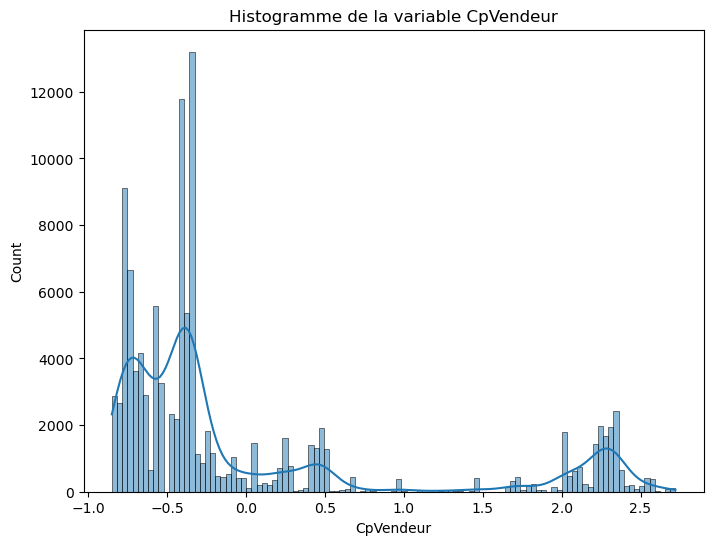

La variable CpVendeur ne suit pas une loi normale (p-value=0.0)


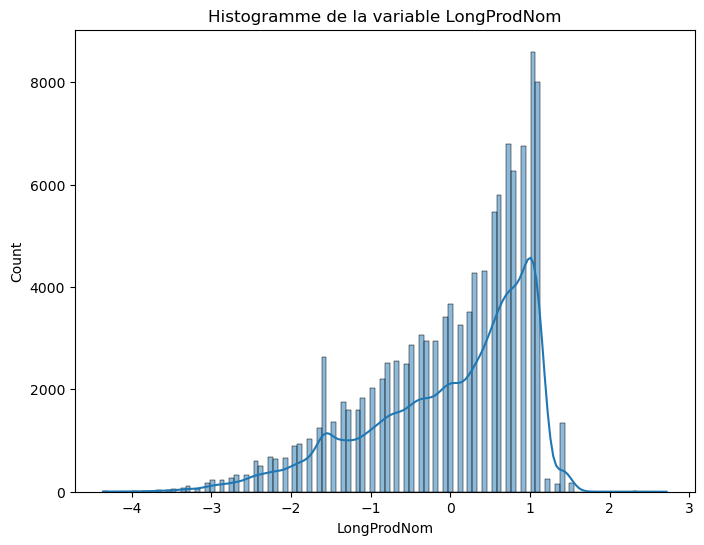

La variable LongProdNom ne suit pas une loi normale (p-value=0.0)


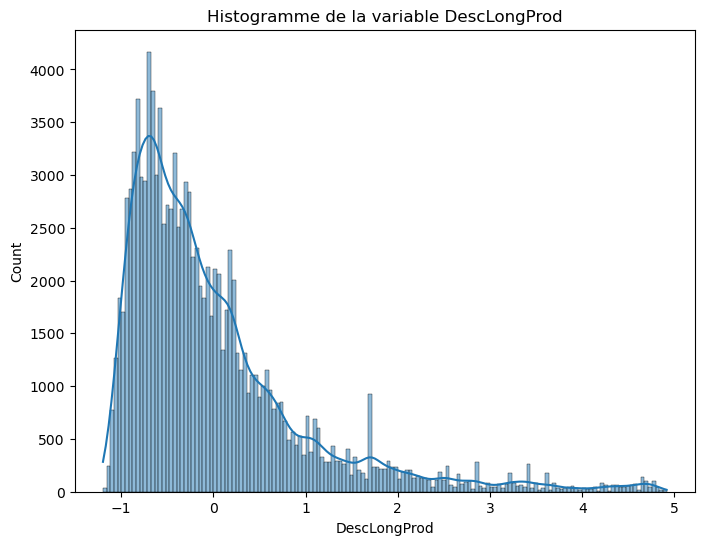

La variable DescLongProd ne suit pas une loi normale (p-value=0.0)


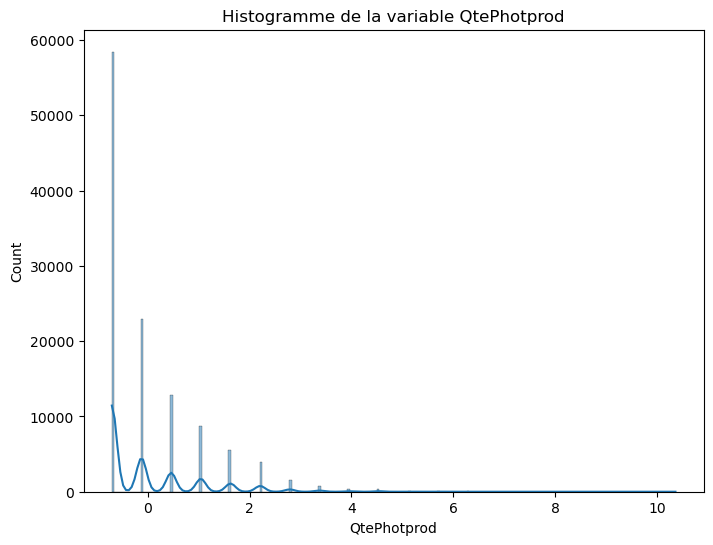

La variable QtePhotprod ne suit pas une loi normale (p-value=0.0)


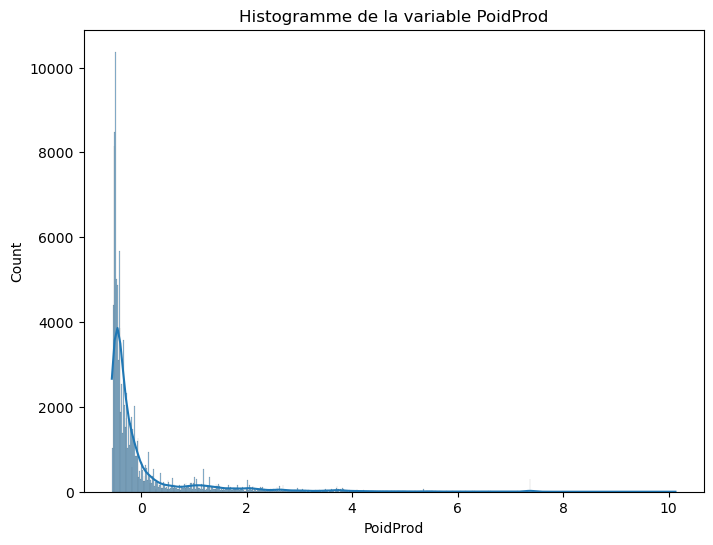

La variable PoidProd suit une loi normale (p-value=nan)


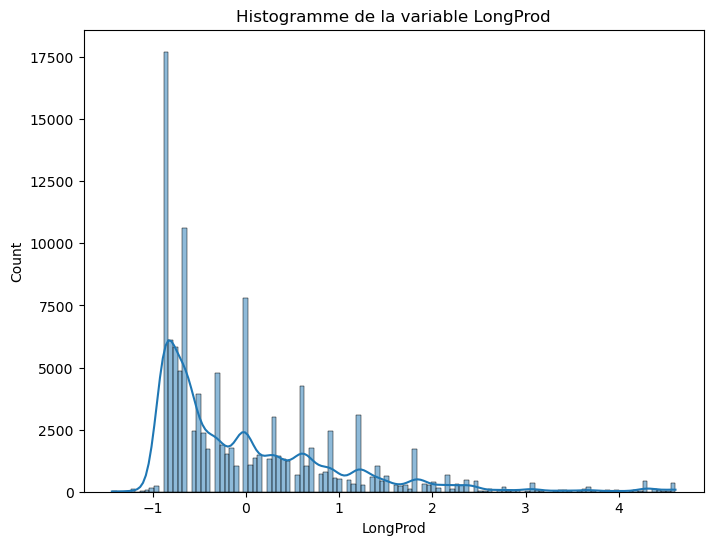

La variable LongProd suit une loi normale (p-value=nan)


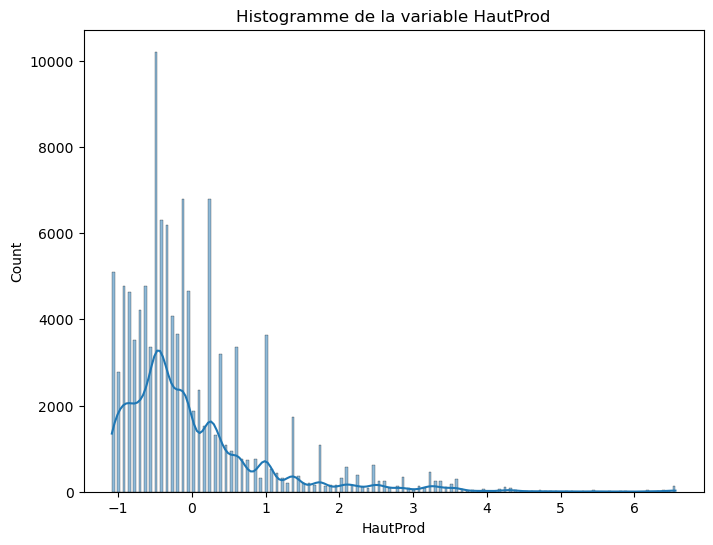

La variable HautProd suit une loi normale (p-value=nan)


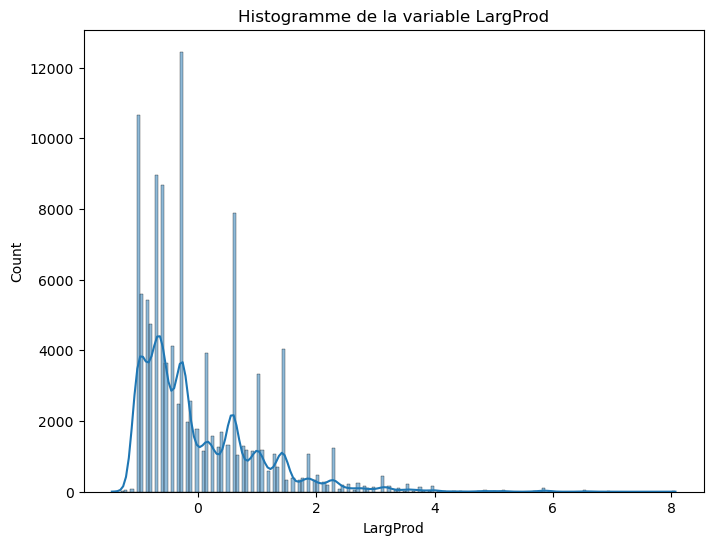

La variable LargProd suit une loi normale (p-value=nan)


In [276]:
import scipy.stats as stats
for column in df.columns :
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

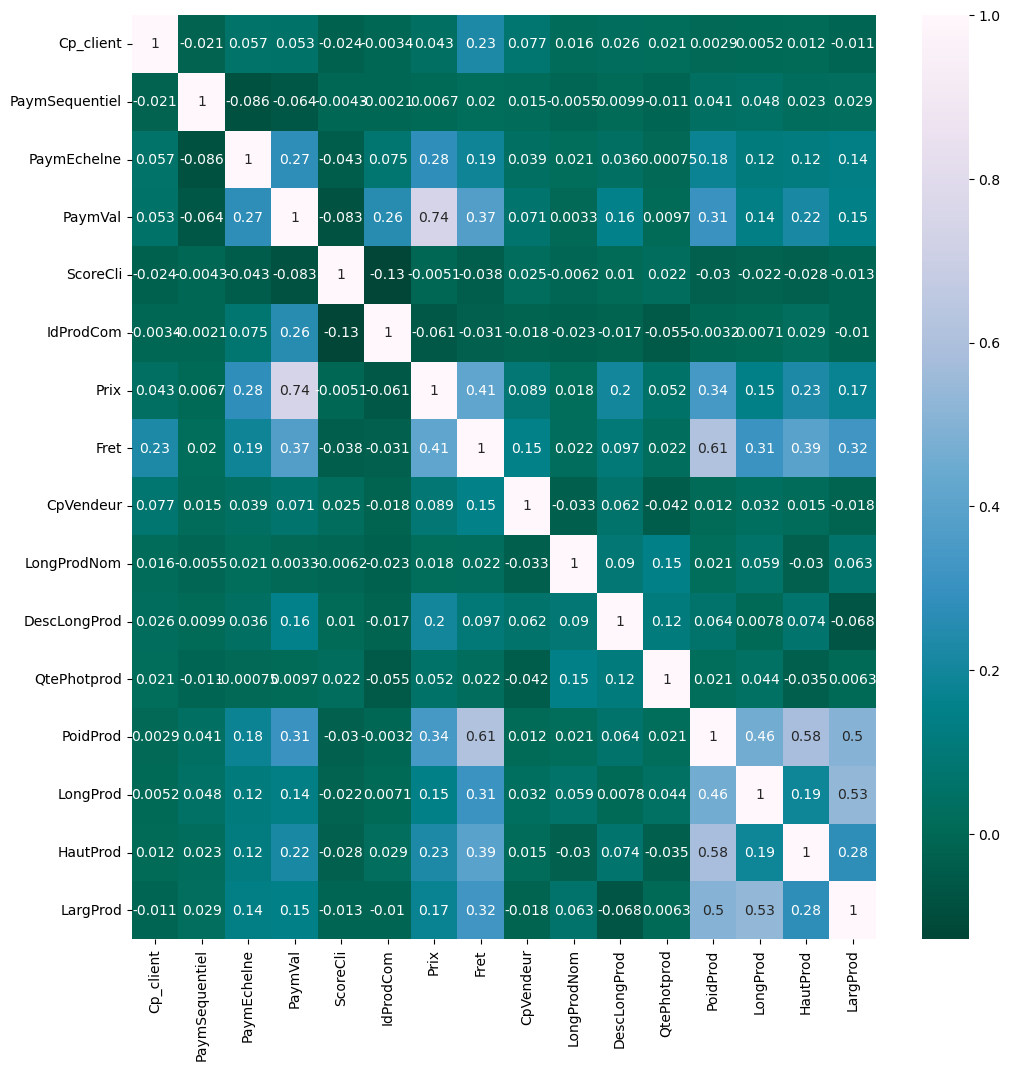

In [277]:
plt.figure(figsize=(12,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap="PuBuGn_r");

### Les commandes clients

In [278]:
df_m.shape

(115609, 38)

In [279]:
Nbr_comm.Nbr_comm = df_m.groupby('customer_unique_id')['order_id'].nunique()

In [281]:
Nbr_comm.shape[0]

93396

In [173]:
vue = Nbr_comm > 1

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    False
0000b849f77a49e4a4ce2b2a4ca5be3f    False
0000f46a3911fa3c0805444483337064    False
0000f6ccb0745a6a4b88665a16c9f078    False
0004aac84e0df4da2b147fca70cf8255    False
                                    ...  
fffcf5a5ff07b0908bd4e2dbc735a684    False
fffea47cd6d3cc0a88bd621562a9d061    False
ffff371b4d645b6ecea244b27531430a    False
ffff5962728ec6157033ef9805bacc48    False
ffffd2657e2aad2907e67c3e9daecbeb    False
Name: order_id, Length: 93396, dtype: bool

In [164]:
Plus_comm = sum(Nbr_comm > 1)

In [165]:
Plus_comm

2807

In [166]:
Pourc_comm = (Plus_comm / len(Nbr_comm)) * 100

In [167]:
Pourc_comm 

3.0054820334917984

In [169]:
print(f"{Pourc_comm:.2f}% de client qui ont passé plus de commandes.")

3.01% de client qui ont passé plus de commandes.
